<a href="https://colab.research.google.com/github/keshavprof123/EDA-and-Predictive-Modeling-on-Synthetic-Transaction-Data/blob/main/EDA_and_Predictive_Modeling_on_Synthetic_Transaction_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

data = {'amount': np.random.randint(10, 100, 1000050),
       'merchant': np.random.choice(['Amazon', 'Walmart', 'Target', 'eBay', 'Apple'], 1000050),
       'time': pd.to_datetime(np.random.randint(1577836800, 1609459200, 1000050), unit='s'),
       'transac_type': np.random.choice([True, False], 1000050)}

df = pd.DataFrame(data)

def to_unix_time(dt):
    return (dt - datetime.datetime(1970, 1, 1)).total_seconds()

df['time'] = df['time'].apply(to_unix_time)

# Preprocessing
df['merchant'] = df['merchant'].astype('category')
df['transac_type'] = df['transac_type'].astype(int)
df = pd.get_dummies(df, columns=['merchant'])

X = df.drop(columns=['transac_type', 'time'])
y = df['transac_type']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
lr_pred = lr_model.predict(X_test)
dt_pred = dt_model.predict(X_test)

# Evaluation
lr_accuracy = accuracy_score(y_test, lr_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)

print("Logistic Regression Accuracy:", lr_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)



Logistic Regression Accuracy: 0.5016249187540623
Decision Tree Accuracy: 0.49898005099745013


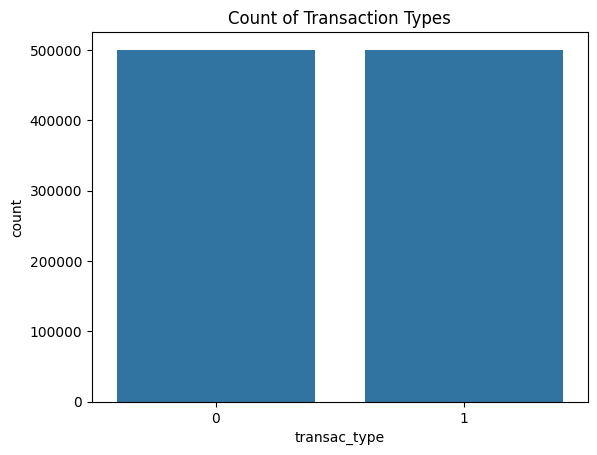

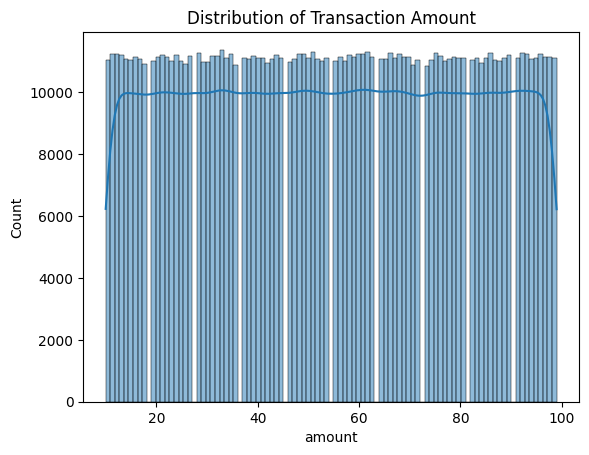

In [50]:
sns.countplot(x="transac_type", data=df)
plt.title('Count of Transaction Types')
plt.show()

sns.histplot(data=df, x="amount", kde=True)
plt.title('Distribution of Transaction Amount')
plt.show()

In [51]:
from sklearn.ensemble import RandomForestClassifier

# Train a RandomForestClassifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions with the RandomForestClassifier
rf_pred = rf_model.predict(X_test)

# Evaluate the RandomForestClassifier
rf_accuracy = accuracy_score(y_test, rf_pred)

print("Random Forest Classifier Accuracy:", rf_accuracy)

Random Forest Classifier Accuracy: 0.4991850407479626


In [44]:
!pip install xgboost

from xgboost import XGBClassifier

# Train an XGBoost Classifier model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions with the XGBoost Classifier
xgb_pred = xgb_model.predict(X_test)

# Evaluate the XGBoost Classifier
xgb_accuracy = accuracy_score(y_test, xgb_pred)

print("XGBoost Classifier Accuracy:", xgb_accuracy)



XGBoost Classifier Accuracy: 0.495


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:46:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [52]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score # Make sure to import accuracy_score

# Define a smaller parameter grid for demonstration
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Remove use_label_encoder
xgb_grid = GridSearchCV(XGBClassifier(eval_metric='logloss', random_state=42), param_grid, cv=3, scoring='accuracy')

print("Starting Grid Search for XGBoost...")
xgb_grid.fit(X_train, y_train)
print("Grid Search Complete.")

print("Best parameters found by Grid Search:", xgb_grid.best_params_)

# Train a new model with the best parameters
xgb_best_model = xgb_grid.best_estimator_
xgb_best_pred = xgb_best_model.predict(X_test)
xgb_best_accuracy = accuracy_score(y_test, xgb_best_pred)

print("XGBoost (tuned) Classifier Accuracy:", xgb_best_accuracy)

Starting Grid Search for XGBoost...
Grid Search Complete.
Best parameters found by Grid Search: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 150}
XGBoost (tuned) Classifier Accuracy: 0.4997750112494375


In [58]:
!pip install xgboost

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Train an XGBoost Classifier model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions with the XGBoost Classifier
xgb_pred = xgb_model.predict(X_test)

# Evaluate the XGBoost Classifier
xgb_accuracy = accuracy_score(y_test, xgb_pred)

print("XGBoost Classifier Accuracy:", xgb_accuracy)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:03:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classifier Accuracy: 0.4991900404979751


In [59]:
model_accuracies = {
    'Logistic Regression': lr_accuracy,
    'Decision Tree Classifier': dt_accuracy,
    'Random Forest Classifier': rf_accuracy,
    'XGBoost Classifier': xgb_accuracy,
    'XGBoost (tuned) Classifier': xgb_best_accuracy
}

# Create a DataFrame for the table
accuracy_df = pd.DataFrame(list(model_accuracies.items()), columns=['Model', 'Accuracy'])

# Sort by accuracy for better readability (optional)
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)

print("\nModel Accuracy Table:")
accuracy_df


Model Accuracy Table:


,Model,Accuracy
0,Logistic Regression,0.501625
4,XGBoost (tuned) Classifier,0.499775
3,XGBoost Classifier,0.499190
2,Random Forest Classifier,0.499185
1,Decision Tree Classifier,0.498980


<ipython-input-60-1271382692>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=accuracy_df.sort_values(by='Accuracy', ascending=False), palette='viridis')


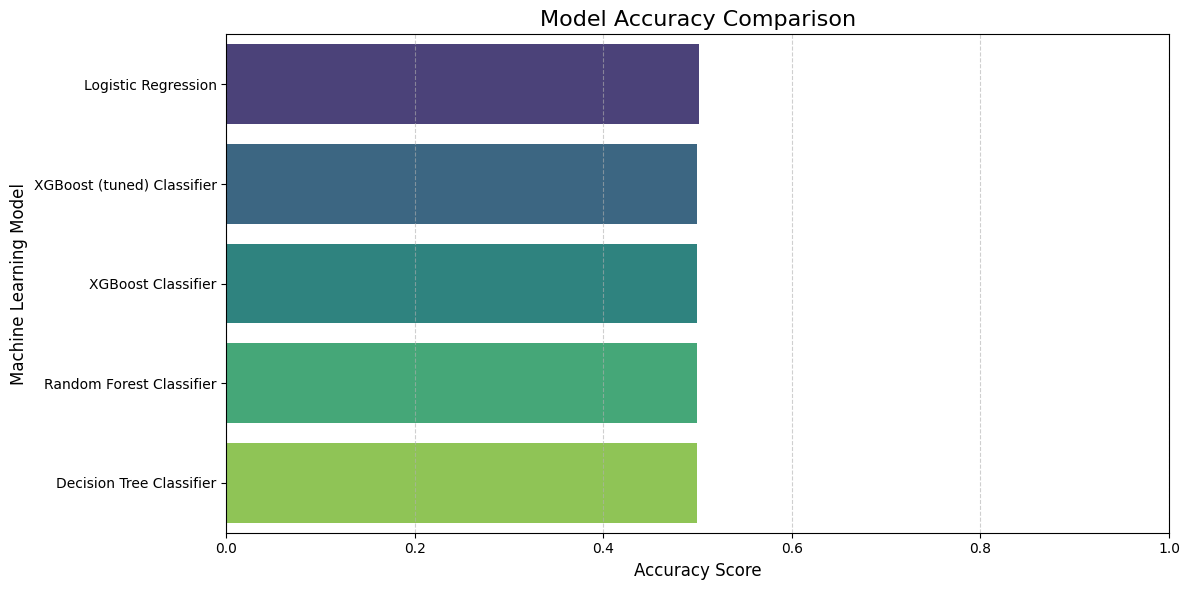

In [60]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Accuracy', y='Model', data=accuracy_df.sort_values(by='Accuracy', ascending=False), palette='viridis')
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Accuracy Score', fontsize=12)
plt.ylabel('Machine Learning Model', fontsize=12)
plt.xlim(0, 1.0)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

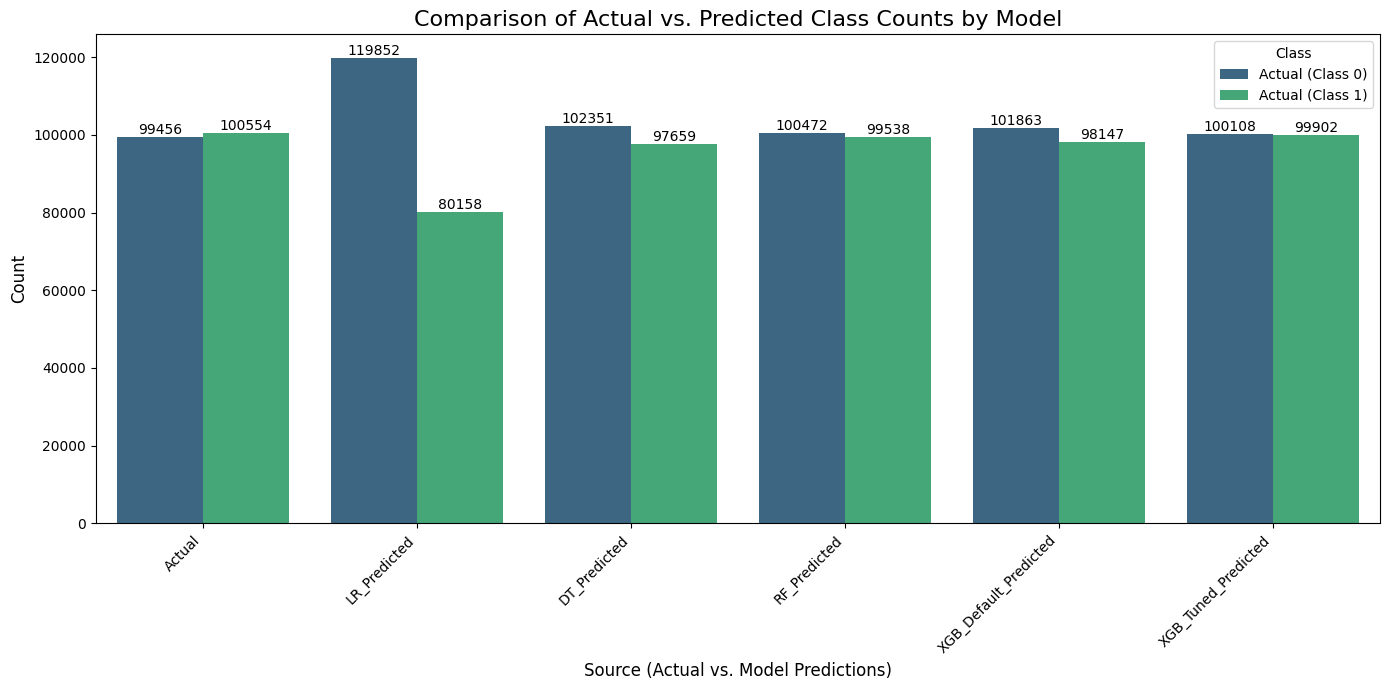

In [61]:
pred_counts = pd.DataFrame({
    'Actual': y_test.value_counts(),
    'LR_Predicted': pd.Series(lr_pred).value_counts(),
    'DT_Predicted': pd.Series(dt_pred).value_counts(),
    'RF_Predicted': pd.Series(rf_pred).value_counts(),
    'XGB_Default_Predicted': pd.Series(xgb_pred).value_counts(),
    'XGB_Tuned_Predicted': pd.Series(xgb_best_pred).value_counts()
}).fillna(0)

pred_counts = pred_counts.transpose()
pred_counts = pred_counts.reset_index().rename(columns={'index': 'Source'})

pred_counts_melted = pred_counts.melt(id_vars='Source', var_name='Class', value_name='Count')

plt.figure(figsize=(14, 7))
ax = sns.barplot(x='Source', y='Count', hue='Class', data=pred_counts_melted, palette='viridis')

for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.title('Comparison of Actual vs. Predicted Class Counts by Model', fontsize=16)
plt.xlabel('Source (Actual vs. Model Predictions)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Actual (Class 0)', 'Actual (Class 1)'] if 'Actual' in pred_counts_melted['Source'].unique() else labels, title='Class')

plt.tight_layout()
plt.show()

<ipython-input-64-2529621747>:6: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead.
  merchant_counts = df['merchant_Amazon'] + df['merchant_Walmart'] + df['merchant_Target'] + df['merchant_eBay'] + df['merchant_Apple']


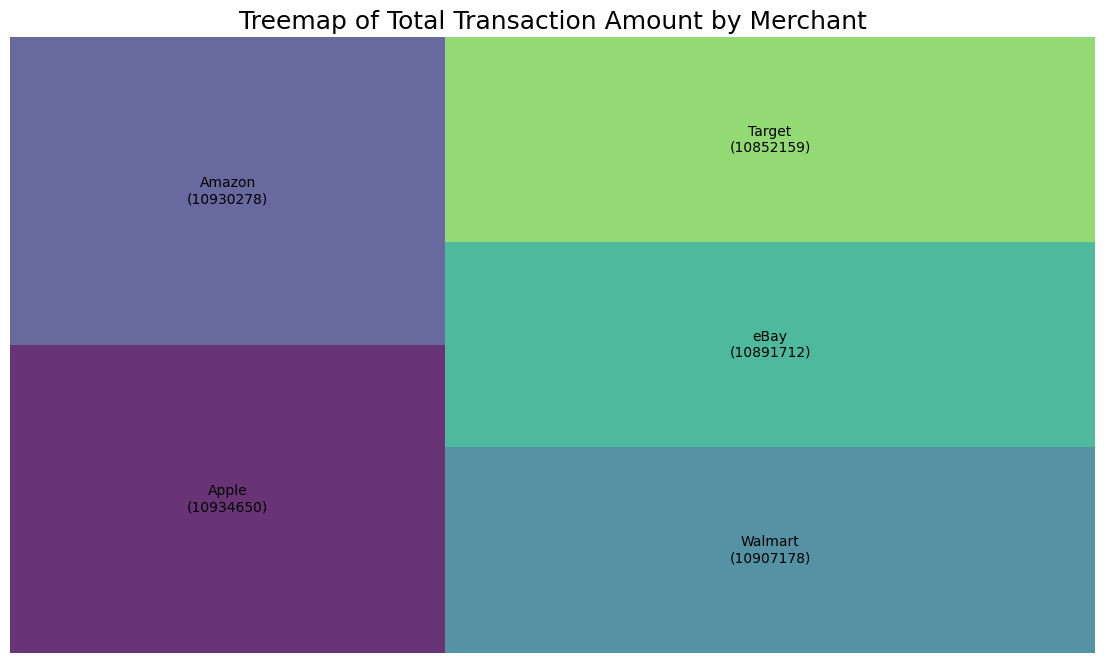

In [64]:
!pip install squarify
import squarify
import matplotlib.cm as cm

# Aggregate data for the treemap, for example by merchant
merchant_counts = df['merchant_Amazon'] + df['merchant_Walmart'] + df['merchant_Target'] + df['merchant_eBay'] + df['merchant_Apple']
merchant_counts = merchant_counts.astype(int).value_counts().sort_index(ascending=False)

merchant_amount_sum = original_df.groupby('merchant')['amount'].sum().reset_index()

# Sort data
merchant_amount_sum = merchant_amount_sum.sort_values(by='amount', ascending=False)

# Create labels
labels = [f"{name}\n({amount:.0f})" for name, amount in zip(merchant_amount_sum['merchant'], merchant_amount_sum['amount'])]

# Define colors (optional)
colors = [plt.cm.viridis(i / float(len(merchant_amount_sum))) for i in range(len(merchant_amount_sum))]

# Plotting the treemap
plt.figure(figsize=(14, 8))
squarify.plot(sizes=merchant_amount_sum['amount'], label=labels, alpha=.8, color=colors)
plt.title('Treemap of Total Transaction Amount by Merchant', fontsize=18)
plt.axis('off')
plt.show()